<a href="https://colab.research.google.com/github/Anisha-Tasneem/Phishing-Email-Detection/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess & Model Train

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import string
from nltk.corpus import stopwords
import psutil
import time

# Helper function to get current CPU and RAM usage
def get_resource_usage():
    cpu_usage = psutil.cpu_percent()
    ram_usage = psutil.virtual_memory().used / (1024 ** 3)  # Convert bytes to GB
    return cpu_usage, ram_usage

# Record the start time and resource usage for data loading
start_time_data_loading = time.time()
cpu_before, ram_before = get_resource_usage()

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE445/Phishing_Email.csv')

# Record the end time for data loading
end_time_data_loading = time.time()

# Manually defining a basic set of English stopwords
basic_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
    "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma',
    'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
    "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
}

# Preprocessing the email text
def preprocess_text(text):
    if not isinstance(text, str):
        text = ''
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Record the start time for preprocessing
start_time_preprocessing = time.time()

# Apply the preprocessing to the Email Text column
df['Email Text'] = df['Email Text'].apply(preprocess_text)

# Record the end time for preprocessing
end_time_preprocessing = time.time()

# Convert Email Text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Email Text']).toarray()

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Email Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Record the start time for training
start_time_training = time.time()

# Train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Record the end time for training
end_time_training = time.time()

# Record the start time for evaluation
start_time_evaluation = time.time()

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Record the end time for evaluation
end_time_evaluation = time.time()

# Get resource usage after training
cpu_after, ram_after = get_resource_usage()

# Print resource usage and other metrics
print(f'CPU usage before training: {cpu_before}%')
print(f'RAM usage before training: {ram_before:.2f} GB')
print(f'CPU usage after training: {cpu_after}%')
print(f'RAM usage after training: {ram_after:.2f} GB')
print(f'Total data loading time: {end_time_data_loading - start_time_data_loading:.2f} seconds')
print(f'Total preprocessing time: {end_time_preprocessing - start_time_preprocessing:.2f} seconds')
print(f'Total training time: {end_time_training - start_time_training:.2f} seconds')
print(f'Total evaluation time: {end_time_evaluation - start_time_evaluation:.2f} seconds')
print(f'Overall runtime: {end_time_evaluation - start_time_data_loading:.2f} seconds')
print(f'Accuracy: {accuracy * 100:.2f}%')

CPU usage before training: 22.6%
RAM usage before training: 3.56 GB
CPU usage after training: 82.2%
RAM usage after training: 4.03 GB
Total data loading time: 0.86 seconds
Total preprocessing time: 11.18 seconds
Total training time: 47.94 seconds
Total evaluation time: 0.32 seconds
Overall runtime: 79.28 seconds
Accuracy: 96.41%


# Hyper-parameter space exploration  

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier # Import the AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialize the AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42) # Initialize clf with the classifier

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy') # Pass the initialized classifier
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Print the mean cross-validated score of the best estimator
print("Best Mean Cross-Validated Score:")
print(grid_search.best_score_)

# Fit the best model on the full training set and evaluate on the test set
best_clf.fit(X_train, y_train)
test_accuracy = best_clf.score(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:")
print(test_accuracy)

Best Hyperparameters:
{'learning_rate': 1, 'n_estimators': 200}
Best Mean Cross-Validated Score:
0.9485254691689008
Test Accuracy:
0.9504021447721179


# Learning curve  

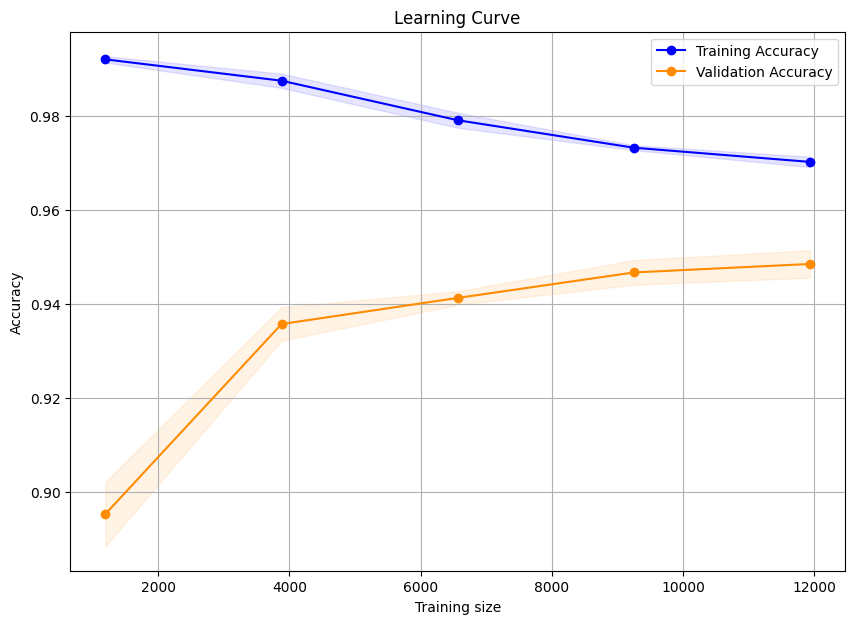

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 7))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training size")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="darkorange")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue",
             label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="darkorange",
             label="Validation Accuracy")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(best_clf, "Learning Curve", X_train, y_train, cv=5, n_jobs=-1)

plt.show()

## Effects of the regularizers

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the base classifier with regularizers (L1 or L2)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoost classifier with L1 regularization
ada_boost_l1 = AdaBoostClassifier(base_estimator=base_classifier, algorithm='SAMME', n_estimators=100, random_state=42)

# Define the AdaBoost classifier with L2 regularization
ada_boost_l2 = AdaBoostClassifier(base_estimator=base_classifier, algorithm='SAMME.R', n_estimators=100, random_state=42)

# Fit the models
ada_boost_l1.fit(X_train, y_train)
ada_boost_l2.fit(X_train, y_train)

# Make predictions
y_pred_l1 = ada_boost_l1.predict(X_test)
y_pred_l2 = ada_boost_l2.predict(X_test)

# Evaluate the models
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

print("Accuracy with L1 regularization:", accuracy_l1)
print("Accuracy with L2 regularization:", accuracy_l2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy with L1 regularization: 0.8737265415549598
Accuracy with L2 regularization: 0.9345844504021448


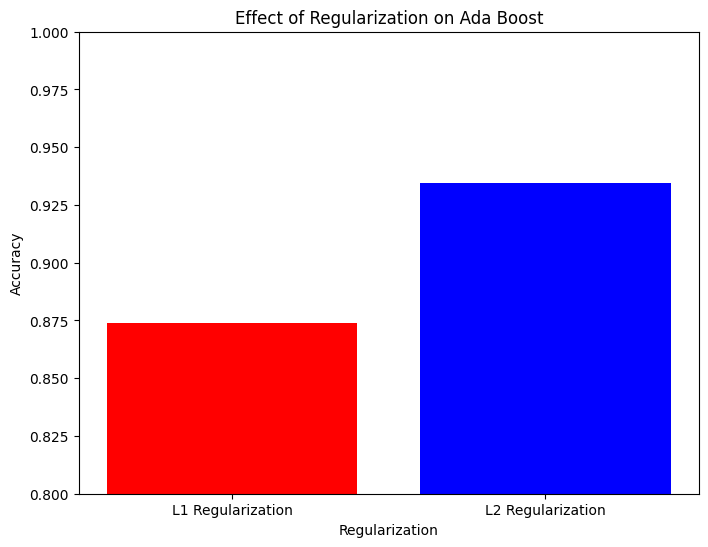

In [ ]:
import matplotlib.pyplot as plt

# Define the labels and accuracies
labels = ['L1 Regularization', 'L2 Regularization']
accuracies = [accuracy_l1, accuracy_l2]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['red', 'blue'])
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Ada Boost')
plt.ylim(0.8, 1)  # Set the y-axis limits for better visualization
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

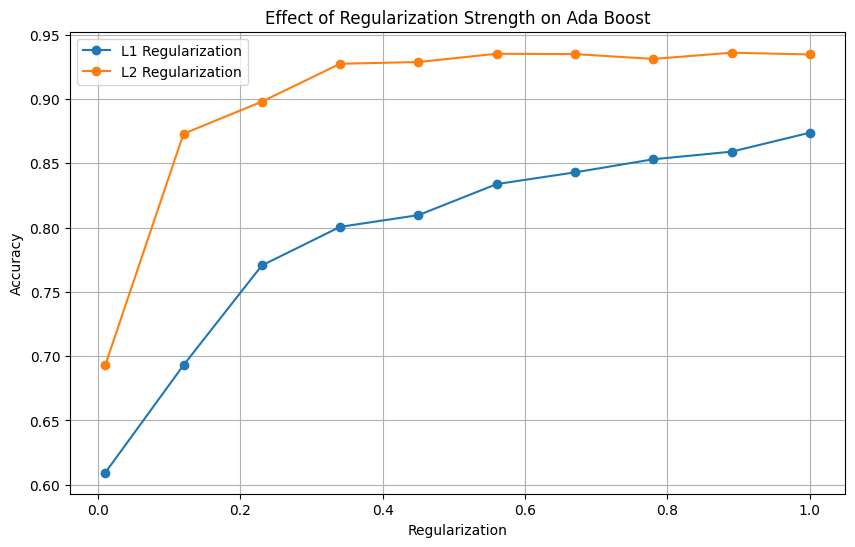

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of regularization strengths
regularization_strengths = np.linspace(0.01, 1, 10)

# Lists to store accuracies for L1 and L2 regularization
accuracies_l1 = []
accuracies_l2 = []

# Iterate over regularization strengths
for alpha in regularization_strengths:
    # Define the AdaBoost classifier with L1 regularization
    ada_boost_l1 = AdaBoostClassifier(base_estimator=base_classifier, algorithm='SAMME', n_estimators=100, random_state=42, learning_rate=alpha)
    ada_boost_l1.fit(X_train, y_train)
    y_pred_l1 = ada_boost_l1.predict(X_test)
    accuracies_l1.append(accuracy_score(y_test, y_pred_l1))

    # Define the AdaBoost classifier with L2 regularization
    ada_boost_l2 = AdaBoostClassifier(base_estimator=base_classifier, algorithm='SAMME.R', n_estimators=100, random_state=42, learning_rate=alpha)
    ada_boost_l2.fit(X_train, y_train)
    y_pred_l2 = ada_boost_l2.predict(X_test)
    accuracies_l2.append(accuracy_score(y_test, y_pred_l2))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(regularization_strengths, accuracies_l1, marker='o', label='L1 Regularization')
plt.plot(regularization_strengths, accuracies_l2, marker='o', label='L2 Regularization')
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Strength on Ada Boost')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy, Precision, Recall, f1-score

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.94      0.97      0.95      1457
    Safe Email       0.98      0.96      0.97      2273

      accuracy                           0.96      3730
     macro avg       0.96      0.96      0.96      3730
  weighted avg       0.96      0.96      0.96      3730



# Confusion Metrix

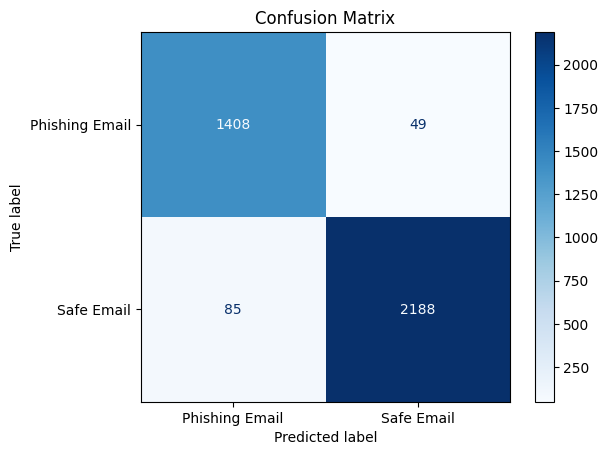

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# AUC ROC

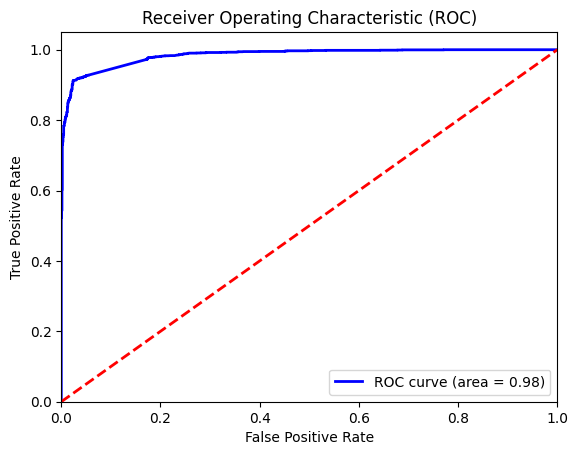

AUC: 0.98


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Train the AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train) # The model needs to be trained before it can be used to generate predictions

# Make predictions
y_pred = clf.predict(X_test)

# Get the predicted probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.2f}')

# CPU RAM

In [ ]:
import psutil

# Get CPU usage
cpu_usage = psutil.cpu_percent()
print(f'CPU Usage: {cpu_usage}%')

# Get memory usage
memory_info = psutil.virtual_memory()
print(f'Total Memory: {memory_info.total} bytes')
print(f'Used Memory: {memory_info.used} bytes')
print(f'Free Memory: {memory_info.available} bytes')

# Get GPU information (if available)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

CPU Usage: 62.7%
Total Memory: 13609426944 bytes
Used Memory: 3260747776 bytes
Free Memory: 10013462528 bytes


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3512698229663911107
 xla_global_id: -1]